In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv("C:/Users/User/Documents/TCC/db_PainelRioCovid.csv", sep=",",error_bad_lines=False, index_col=False, dtype='unicode')

In [4]:
dataset.shape

(596116, 12)

In [5]:
print(dataset)

       classificação_final  dt_notific dt_inicio_sintomas  \
0               CONFIRMADO  12/31/2021         12/31/2021   
1               CONFIRMADO  12/28/2021         12/26/2021   
2               CONFIRMADO  01/03/2022         12/30/2021   
3               CONFIRMADO  12/29/2021         12/04/2021   
4               CONFIRMADO  01/07/2022         12/17/2021   
...                    ...         ...                ...   
596111          CONFIRMADO  07/29/2021         07/25/2021   
596112          CONFIRMADO  07/29/2021         07/25/2021   
596113          CONFIRMADO  11/09/2021         11/04/2021   
596114          CONFIRMADO  06/02/2021         05/30/2021   
596115          CONFIRMADO  08/09/2021         08/05/2021   

            bairro_resid_estadia ap_residencia_estadia sexo faixa_etaria  \
0                      MADUREIRA                   3.3    M   De 60 a 69   
1       RECREIO DOS BANDEIRANTES                   4.0    M     De 0 a 9   
2                      MADUREIRA       

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596116 entries, 0 to 596115
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   classificação_final    596116 non-null  object
 1   dt_notific             596113 non-null  object
 2   dt_inicio_sintomas     596116 non-null  object
 3   bairro_resid_estadia   596116 non-null  object
 4   ap_residencia_estadia  596116 non-null  object
 5   sexo                   596116 non-null  object
 6   faixa_etaria           592591 non-null  object
 7   evolucao               596017 non-null  object
 8   dt_evolucao            70494 non-null   object
 9   raca_cor               596116 non-null  object
 10  Data_atualizacao       596116 non-null  object
 11  sistema                596116 non-null  object
dtypes: object(12)
memory usage: 54.6+ MB


In [7]:
dataset.describe()

,classificação_final,dt_notific,dt_inicio_sintomas,bairro_resid_estadia,ap_residencia_estadia,sexo,faixa_etaria,evolucao,dt_evolucao,raca_cor,Data_atualizacao,sistema
count,596116,596113,596116,596116,596116,596116,592591,596017,70494,596116,596116,596116
unique,1,696,730,164,11,3,11,5,672,7,2,2
top,CONFIRMADO,01/12/2022,01/10/2022,Ignorado,4.0,F,De 30 a 39,Recuperado,05/06/2020,Parda,01/18/2022,ESUS
freq,596116,11605,10011,31662,81419,330378,119385,448430,369,214576,509935,509935


In [8]:
dataset['dt_notific'] = pd.to_datetime(dataset['dt_notific'])

In [9]:
dataset.index

RangeIndex(start=0, stop=596116, step=1)

In [10]:
dataset.index = dataset['dt_notific']
dataset.index.to_period('M')
dataset.index

DatetimeIndex(['2021-12-31', '2021-12-28', '2022-01-03', '2021-12-29',
               '2022-01-07', '2020-12-07', '2020-10-14', '2020-12-04',
               '2020-11-30', '2020-12-07',
               ...
               '2021-08-12', '2021-08-11', '2021-08-09', '2021-08-06',
               '2021-07-29', '2021-07-29', '2021-07-29', '2021-11-09',
               '2021-06-02', '2021-08-09'],
              dtype='datetime64[ns]', name='dt_notific', length=596116, freq=None)

In [11]:
dataset.isnull().sum()

classificação_final           0
dt_notific                    3
dt_inicio_sintomas            0
bairro_resid_estadia          0
ap_residencia_estadia         0
sexo                          0
faixa_etaria               3525
evolucao                     99
dt_evolucao              525622
raca_cor                      0
Data_atualizacao              0
sistema                       0
dtype: int64

In [12]:
dataset = dataset.drop(columns=dataset.columns[8:9])

In [13]:
dataset.isnull().sum()

classificação_final         0
dt_notific                  3
dt_inicio_sintomas          0
bairro_resid_estadia        0
ap_residencia_estadia       0
sexo                        0
faixa_etaria             3525
evolucao                   99
raca_cor                    0
Data_atualizacao            0
sistema                     0
dtype: int64

In [14]:
datamin = dataset['dt_notific'].min()
datamin

Timestamp('1957-07-15 00:00:00')

In [15]:
datamax = dataset['dt_notific'].max()
datamax

Timestamp('2022-01-18 00:00:00')

In [16]:
agrupado = dataset.groupby(['sexo']).size().sort_values()
agrupado

sexo
I        13
M    265725
F    330378
dtype: int64

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


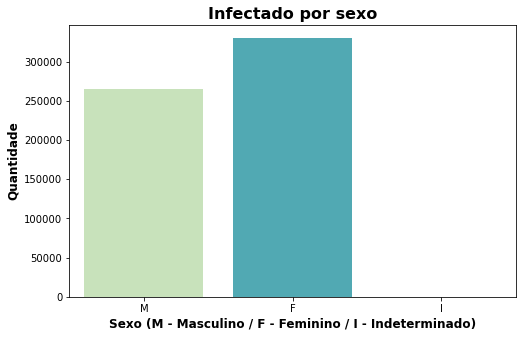

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
srn.countplot(dataset['sexo'], palette='YlGnBu')
plt.title('Infectado por sexo', fontsize=16, fontweight='bold')
plt.xlabel('Sexo (M - Masculino / F - Feminino / I - Indeterminado)', fontsize=12,fontweight='bold')
plt.ylabel('Quantidade', fontsize=12,fontweight='bold')
plt.show()


C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Quantidade Infectados')

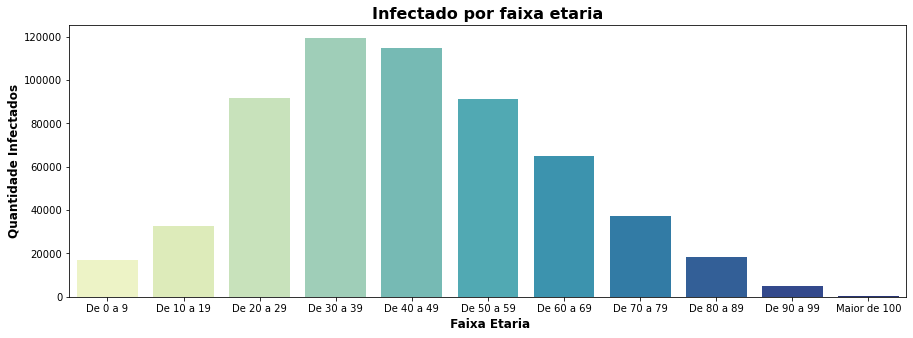

In [18]:
fig, az = plt.subplots(figsize=(15,5))
srn.countplot(dataset['faixa_etaria'].sort_values(), palette='YlGnBu')
plt.title('Infectado por faixa etaria', fontsize=16, fontweight='bold')
plt.xlabel(' Faixa Etaria', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade Infectados', fontsize=12, fontweight='bold')

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Quantidade Infectados')

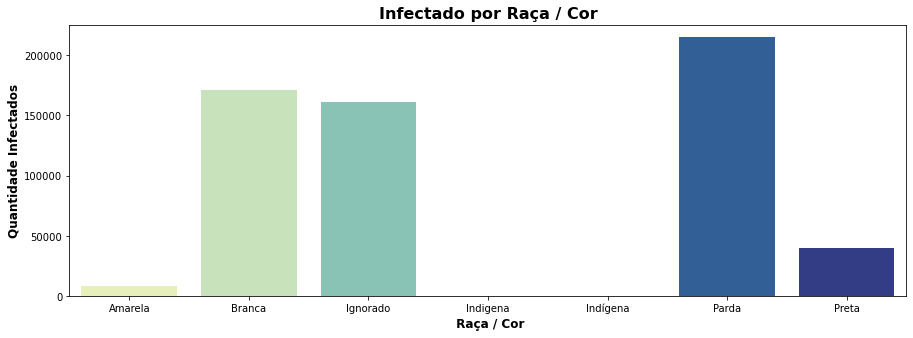

In [19]:
fig, az = plt.subplots(figsize=(15,5))
srn.countplot(dataset['raca_cor'].sort_values(), palette='YlGnBu')
plt.title('Infectado por Raça / Cor', fontsize=16, fontweight='bold')
plt.xlabel(' Raça / Cor', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade Infectados', fontsize=12, fontweight='bold')

In [ ]:
#funcao para retirar os acentos
import unicodedata
def retirar_acentos(com_acento):
    sem_acentos = unicodedata.normalize("NFD",com_acento)
    sem_acentos = sem_acentos.enconde("ascii","ignore")
    sem_acentos = sem_acentos.decode("utf-8")
    return sem_acento


In [ ]:
dataset['raca_cor'] = dataset['raca_cor'].apply(retirar_acentos)
dataset.set_index(['raca_cor'],inplace=true)

In [ ]:
fig, az = plt.subplots(figsize=(15,5))
srn.countplot(dataset['raca_cor'].sort_values(), palette='YlGnBu')
plt.title('Infectado por Raça / Cor', fontsize=16, fontweight='bold')
plt.xlabel(' Raça / Cor', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade Infectados', fontsize=12, fontweight='bold')

In [20]:
#retirando das datas para rodar o KMeans
dataset.drop(['dt_notific', 'dt_inicio_sintomas','Data_atualizacao','sistema','ap_residencia_estadia'], axis=1, inplace=True)

In [21]:
X = dataset

In [22]:
#transormando os valores para inteiro
c = dataset['classificação_final']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['classificação_final'] = le.fit_transform(X['classificação_final'])

c = le.transform(c)

In [23]:
b = dataset['bairro_resid_estadia']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['bairro_resid_estadia'] = le.fit_transform(X['bairro_resid_estadia'])

b = le.transform(b)

In [24]:
s = dataset['sexo']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['sexo'] = le.fit_transform(X['sexo'])

s = le.transform(s)

In [25]:
f = dataset['faixa_etaria']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['faixa_etaria'] = le.fit_transform(X['faixa_etaria'])

f = le.transform(f)

In [26]:
e = dataset['evolucao']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['evolucao'] = le.fit_transform(X['evolucao'])

e = le.transform(e)

In [27]:
r = dataset['raca_cor']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['raca_cor'] = le.fit_transform(X['raca_cor'])

r = le.transform(r)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 596116 entries, 2021-12-31 to 2021-08-09
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   classificação_final   596116 non-null  int32
 1   bairro_resid_estadia  596116 non-null  int32
 2   sexo                  596116 non-null  int32
 3   faixa_etaria          596116 non-null  int32
 4   evolucao              596116 non-null  int32
 5   raca_cor              596116 non-null  int32
dtypes: int32(6)
memory usage: 18.2 MB


In [29]:
dataset.head()

,classificação_final,bairro_resid_estadia,sexo,faixa_etaria,evolucao,raca_cor
dt_notific,,,,,,
2021-12-31,0,88,2,6,4,5
2021-12-28,0,121,2,0,3,5
2022-01-03,0,88,0,8,4,5
2021-12-29,0,139,0,6,3,6
2022-01-07,0,98,0,8,3,2


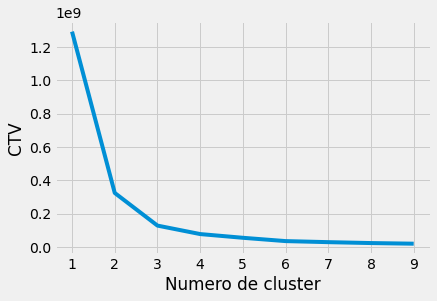

In [30]:
#Escolha do número de cluster método cotovelo
from sklearn.cluster import KMeans 
ctv=[]
for k in range(1,10):
    kmeans = KMeans (n_clusters=k)
    kmeans.fit(dataset)
    ctv.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1,10),ctv)
plt.xticks(range(1,10))
plt.xlabel("Numero de cluster")
plt.ylabel("CTV")
plt.show()


In [36]:
from sklearn.metrics import silhouette_score
silhouette_coef=[]
for k in range(2,10):
    kmeans = KMeans (n_clusters = k)
    kmeans.fit(dataset)
    score = silhouette_score(dataset,kmeans.labels_)
    silhouette_coef.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,10),silhouette_coef)
plt.xticks(range(2,10))
plt.xlabel("Numero de cluster")
plt.ylabel("Silhouette")
plt.show()


KeyboardInterrupt: 

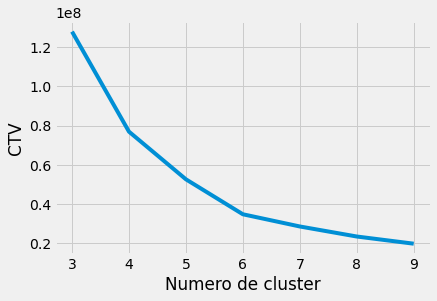

In [32]:
from sklearn.cluster import KMeans 
ctv=[]
for k in range(3,10):
    kmeans = KMeans (n_clusters=k)
    kmeans.fit(dataset)
    ctv.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(3,10),ctv)
plt.xticks(range(3,10))
plt.xlabel("Numero de cluster")
plt.ylabel("CTV")
plt.show()


In [34]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

dataset_transform = ms.fit_transform(dataset)

dataset_normalizado = pd.DataFrame(dataset_transform)

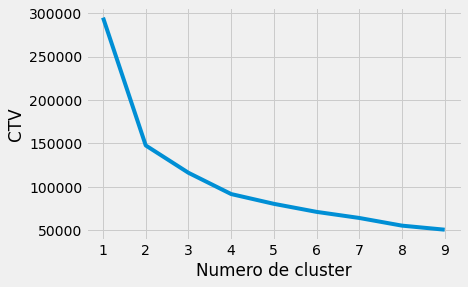

In [35]:
from sklearn.cluster import KMeans 
ctv=[]
for k in range(1,10):
    kmeans = KMeans (n_clusters=k)
    kmeans.fit(dataset_transform)
    ctv.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1,10),ctv)
plt.xticks(range(1,10))
plt.xlabel("Numero de cluster")
plt.ylabel("CTV")
plt.show()


In [37]:
kmeans.cluster_centers_

array([[  0.        , 121.23054418,   0.88155094,   3.98741416,
          1.24593724,   3.07654173],
       [  0.        ,  40.47718305,   0.9003083 ,   3.9873059 ,
          1.20013289,   2.9969422 ]])

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_dataset = pca.fit_transform(dataset)
pca_df = pd.DataFrame(pca_dataset, columns=['pc1','pc2'])
pca_df.tail()

,pc1,pc2
596111,38.785126,0.871557
596112,14.787682,-0.864925
596113,51.789058,-3.488766
596114,39.788963,-2.616369
596115,-71.213539,-1.399056


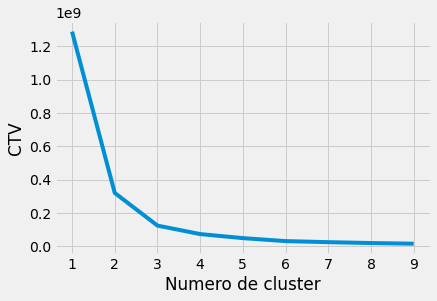

In [45]:
from sklearn.cluster import KMeans 
ctv=[]
for k in range(1,10):
    kmeans = KMeans (n_clusters=k)
    kmeans.fit(pca_dataset)
    ctv.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1,10),ctv)
plt.xticks(range(1,10))
plt.xlabel("Numero de cluster")
plt.ylabel("CTV")
plt.show()

In [46]:
kmeans = KMeans(n_clusters = 3)
kmeans_pca_dataset = kmeans.fit(pca_df)
labels_pca_dataset = kmeans_pca_dataset.labels_
cluster_pca_dataset = pd.concat([pca_df, pd.DataFrame({'pca_cluster':labels_pca_dataset})],axis=1)


0          9.787248
1         42.789853
2          9.786684
3         60.788155
4         19.784334
            ...    
596111    38.785126
596112    14.787682
596113    51.789058
596114    39.788963
596115   -71.213539
Name: pc1, Length: 596116, dtype: float64

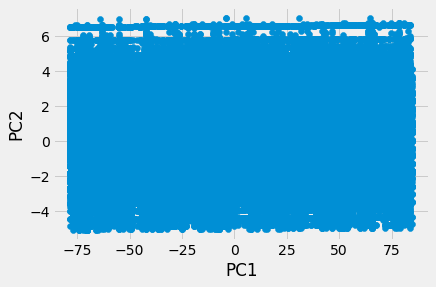

In [61]:
plt.scatter(cluster_pca_dataset['pc1'],cluster_pca_dataset['pc2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [62]:
for idx, component in enumerate(pca.explained_variance_ratio_):
    print(f"Variância Explicada pelo Componente {idx + 1}: {round(component, 2) * 100}%")

Variância Explicada pelo Componente 1: 100.0%
Variância Explicada pelo Componente 2: 0.0%
